In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv(r'C:\Users\zeesh\OneDrive\Desktop\car data.csv')

In [9]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [11]:
dfInput = df.drop(['Car_Name','Selling_Price'],axis = 1)

In [12]:
#dfInput.replace({'Fuel_Type':{'Petrol':0,'Diesel':1, 'CNG':2}},inplace=True)
#dfInput.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
#dfInput.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
  

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#converting string labels into numbers
dfInput.Fuel_Type = le.fit_transform(dfInput.Fuel_Type)
dfInput.Transmission = le.fit_transform(dfInput.Transmission)
dfInput.Seller_Type = le.fit_transform(dfInput.Seller_Type)
dfInput.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,2,0,1,0
1,2013,9.54,43000,1,0,1,0
2,2017,9.85,6900,2,0,1,0
3,2011,4.15,5200,2,0,1,0
4,2014,6.87,42450,1,0,1,0


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train,y_test =train_test_split(dfInput, df.Selling_Price, test_size=0.2)

In [16]:
x_train.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
222,2014,7.60,77632,1,0,1,0
267,2016,9.40,19434,1,0,1,0
235,2017,9.40,15141,2,0,1,0
64,2017,36.23,6000,1,0,0,0
282,2014,14.00,63000,1,0,1,0


In [17]:
#loading linear regression model
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [18]:
LR.fit(x_train, y_train)

LinearRegression()

In [19]:
y_predict = LR.predict(x_test)

In [20]:
from sklearn import metrics
print("Accuracy:", metrics.r2_score(y_test, y_predict)) 

Accuracy: 0.8279672487995038


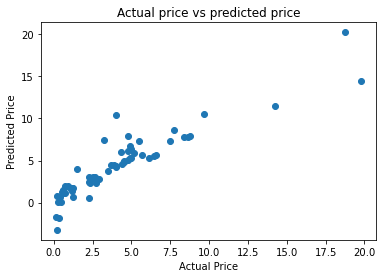

In [21]:
plt.scatter(y_test, y_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs predicted price")
plt.show()


In [22]:
y_predict

array([ 4.24754371e+00,  7.27766818e+00,  5.27133470e+00,  1.44546555e+00,
        8.58743668e+00,  1.73086825e+00,  1.72467751e+00,  5.01506798e+00,
        2.02617612e+01,  2.39785559e+00,  6.19484062e-01,  1.99463374e+00,
       -1.88350986e+00,  1.37054356e+00,  8.46100774e-02,  4.76680635e+00,
        7.87979385e+00,  7.84874220e+00,  3.00722315e+00,  6.76026398e+00,
        7.59292274e-01,  1.44619116e+01,  1.27175779e+00,  4.48914255e+00,
        7.42285440e+00,  5.99480088e+00,  1.04829740e+01,  5.68335630e+00,
        2.99984739e+00,  2.00730766e+00,  6.35320781e-01,  4.48307059e+00,
        2.28354689e+00,  4.99104654e-01,  1.14334451e+00, -1.70650122e+00,
        9.36370686e-03,  5.84739369e+00,  7.84759002e+00,  3.93722540e+00,
        2.86753223e+00,  3.76091762e+00,  5.25613782e+00,  6.32437796e+00,
        4.31849336e+00, -3.25935357e+00,  5.24226172e+00,  1.15366805e+01,
        4.55227928e+00,  2.33807628e+00,  3.08882063e+00,  6.10529873e+00,
        4.96433803e+00,  